In [216]:
'''
다 함께 하는 작업 공간이기 때문에 경로나 파일 명 등을 통일 해야 할 것 같습니다.
그렇게 하지 않으면 경로 때문에 매번 새로운 커밋이 생성 됩니다.
'''

import os

# 현재 작업 디렉토리 확인
current_directory = os.getcwd()
print("Current directory:", current_directory)

# 필요한 CSV 파일이 있는 디렉토리로 변경
target_directory = "C:/k-project/raw_datasets/회귀" # 해당 코드 부분의 경로를 동일하게 하거나 / 깃 리파지토리 안에 파일을 집어 넣는 작업 필요.      
os.chdir(target_directory)

import pandas as pd

# CSV 파일 불러오기
csv_filename = "국가별_CO2_배출량(1980-2021)_회귀_시각화_전처리.csv"  # CSV 파일명. 파일명을 모두 동일하게 해야합니다.
df = pd.read_csv(csv_filename)

# 데이터 확인
print(df.head())


Current directory: C:\k-project\raw_datasets\회귀
   Unnamed: 0      COUNTRY                                   EMISSIONS  Year  \
0           0        World                CO2 emissions (MMtonnes CO2)  1980   
1           1        World                Coal and coke (MMtonnes CO2)  1980   
2           2        World         Consumed natural gas (MMtonnes CO2)  1980   
3           3        World  Petroleum and other liquids (MMtonnes CO2)  1980   
4           4  Afghanistan                CO2 emissions (MMtonnes CO2)  1980   

         Value  
0  18719.16226  
1   7491.61815  
2  2842.337165  
3  8385.206946  
4  1.325964518  


In [217]:
df.head(20)

,Unnamed: 0,COUNTRY,EMISSIONS,Year,Value
0,0,World,CO2 emissions (MMtonnes CO2),1980,18719.16226
1,1,World,Coal and coke (MMtonnes CO2),1980,7491.61815
2,2,World,Consumed natural gas (MMtonnes CO2),1980,2842.337165
3,3,World,Petroleum and other liquids (MMtonnes CO2),1980,8385.206946
4,4,Afghanistan,CO2 emissions (MMtonnes CO2),1980,1.325964518
5,5,Afghanistan,Coal and coke (MMtonnes CO2),1980,0.231313858
6,6,Afghanistan,Consumed natural gas (MMtonnes CO2),1980,0.11110066
7,7,Afghanistan,Petroleum and other liquids (MMtonnes CO2),1980,0.98355
8,8,Albania,CO2 emissions (MMtonnes CO2),1980,9.618526399
9,9,Albania,Coal and coke (MMtonnes CO2),1980,2.379753099


In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38640 entries, 0 to 38639
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  38640 non-null  int64 
 1   COUNTRY     38640 non-null  object
 2   EMISSIONS   38640 non-null  object
 3   Year        38640 non-null  int64 
 4   Value       38232 non-null  object
dtypes: int64(2), object(3)
memory usage: 1.5+ MB


In [219]:
df.columns

Index(['Unnamed: 0', 'COUNTRY', 'EMISSIONS', 'Year', 'Value'], dtype='object')

In [220]:
# 필요없는 열 Unamed: 0 삭제.

df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [221]:
df.isnull().sum()

COUNTRY        0
EMISSIONS      0
Year           0
Value        408
dtype: int64

In [222]:
df['Value'].value_counts()

0              9039
--             2502
0.2             495
0.1             355
0.3             317
               ... 
26.71282665       1
7.614738658       1
1.217705594       1
1.537341198       1
3.969163126       1
Name: Value, Length: 18778, dtype: int64

In [223]:
# df[df.isnull().any(axis=1)]     # 결측치가 있는 모든 데이터 조사.

In [224]:
pd.set_option('display.max_rows', 20)  # 최대 행 수를 15으로 설정
pd.set_option('display.max_columns', 20)  # 최대 열 수를 15으로 설정


In [225]:
# pd.set_option('display.max_rows', None)  # 최대 행 수를 None으로 설정
# pd.set_option('display.max_columns', None)  # 최대 열 수를 None으로 설정


Value 값. ~을 통해서 나온 탄소배출에 관한 것.  
Value 값이 없다는 것은 해당 발전방식을 통해 나온 CO2가 없다는 것.(전량수입)  OR 단순 누락  <--- 단순 누락으로 생각이됨. 0인건 0으로 따로 집계됨.
  
Value 값이 없는 국가 대다수는 섬 나라 같은 작은 국가.  행정 처리가 미흡???? 따라서 None 값의 경우 drop하는것이 어떤가.  
단, 다른 데이터셋들과 merge(병합)시 기준을 어느것으로 두느냐에 따라 달라질 것 같음.  
즉, 다 합친 데이터셋에서 drop을 결정 할지. 각자 drop 한 후 병합을 할지의 차이가 발생. <---- 팀원간 상호협의가 필요하다.
  
특이사항: 독일이 존재함. 또한, 서독, 동독으로 나뉘어져 있음. 독일의 경우   
'Germany',   
'Germany, East',  
'Germany, West'  
이렇게 3개로 나뉘어져 있음. 



In [226]:
df[df['Value'].isnull()]    # 'Value'열 중 결측치가 있는 모든 데이터 조사. 데이터 값은 같으나, 공부를 위해 추가 

,COUNTRY,EMISSIONS,Year,Value
267,Faroe Islands,Petroleum and other liquids (MMtonnes CO2),1980,NaN
343,Greenland,Petroleum and other liquids (MMtonnes CO2),1980,NaN
534,Micronesia,Consumed natural gas (MMtonnes CO2),1980,NaN
535,Micronesia,Petroleum and other liquids (MMtonnes CO2),1980,NaN
614,Northern Mariana Islands,Consumed natural gas (MMtonnes CO2),1980,NaN
...,...,...,...,...
38097,Hawaiian Trade Zone,Coal and coke (MMtonnes CO2),2021,NaN
38335,Northern Mariana Islands,Petroleum and other liquids (MMtonnes CO2),2021,NaN
38567,Tuvalu,Petroleum and other liquids (MMtonnes CO2),2021,NaN
38574,U.S. Territories,Consumed natural gas (MMtonnes CO2),2021,NaN


In [227]:
df[df['Value'] == '0']  # 0인 것은 따로 0으로 집계가 되는 모습

,COUNTRY,EMISSIONS,Year,Value
17,American Samoa,Coal and coke (MMtonnes CO2),1980,0
18,American Samoa,Consumed natural gas (MMtonnes CO2),1980,0
21,Angola,Coal and coke (MMtonnes CO2),1980,0
25,Antarctica,Coal and coke (MMtonnes CO2),1980,0
26,Antarctica,Consumed natural gas (MMtonnes CO2),1980,0
...,...,...,...,...
38625,Western Sahara,Coal and coke (MMtonnes CO2),2021,0
38626,Western Sahara,Consumed natural gas (MMtonnes CO2),2021,0
38629,Yemen,Coal and coke (MMtonnes CO2),2021,0
38634,Zambia,Consumed natural gas (MMtonnes CO2),2021,0


In [228]:
df['COUNTRY'].unique()

array(['World', 'Afghanistan', 'Albania', 'Algeria', 'American Samoa',
       'Angola', 'Antarctica', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burma', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo-Brazzaville',
       'Congo-Kinshasa', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Falkland Islands', 'Faroe Islands',
      

3만개의 데이터 중에서 1만개가 0이 포함되어 있음.

주요 국가들을 살펴 본 결과 각 국가들은 168개의 행을 가지고 있음.

In [229]:
df[df['COUNTRY'].values == 'South Korea']

,COUNTRY,EMISSIONS,Year,Value
756,South Korea,CO2 emissions (MMtonnes CO2),1980,138.9008355
757,South Korea,Coal and coke (MMtonnes CO2),1980,65.50895249
758,South Korea,Consumed natural gas (MMtonnes CO2),1980,0
759,South Korea,Petroleum and other liquids (MMtonnes CO2),1980,73.39188301
1676,South Korea,CO2 emissions (MMtonnes CO2),1981,146.2525588
...,...,...,...,...
37559,South Korea,Petroleum and other liquids (MMtonnes CO2),2020,242.197965
38476,South Korea,CO2 emissions (MMtonnes CO2),2021,678.8909631
38477,South Korea,Coal and coke (MMtonnes CO2),2021,304.1798215
38478,South Korea,Consumed natural gas (MMtonnes CO2),2021,125.2277116


In [230]:
df[df['COUNTRY'].values == 'South Korea']

,COUNTRY,EMISSIONS,Year,Value
756,South Korea,CO2 emissions (MMtonnes CO2),1980,138.9008355
757,South Korea,Coal and coke (MMtonnes CO2),1980,65.50895249
758,South Korea,Consumed natural gas (MMtonnes CO2),1980,0
759,South Korea,Petroleum and other liquids (MMtonnes CO2),1980,73.39188301
1676,South Korea,CO2 emissions (MMtonnes CO2),1981,146.2525588
...,...,...,...,...
37559,South Korea,Petroleum and other liquids (MMtonnes CO2),2020,242.197965
38476,South Korea,CO2 emissions (MMtonnes CO2),2021,678.8909631
38477,South Korea,Coal and coke (MMtonnes CO2),2021,304.1798215
38478,South Korea,Consumed natural gas (MMtonnes CO2),2021,125.2277116


In [231]:
df[df['COUNTRY'].values == 'Japan']

,COUNTRY,EMISSIONS,Year,Value
428,Japan,CO2 emissions (MMtonnes CO2),1980,871.7885899
429,Japan,Coal and coke (MMtonnes CO2),1980,217.4860324
430,Japan,Consumed natural gas (MMtonnes CO2),1980,51.31179207
431,Japan,Petroleum and other liquids (MMtonnes CO2),1980,602.9907654
1348,Japan,CO2 emissions (MMtonnes CO2),1981,848.7916141
...,...,...,...,...
37231,Japan,Petroleum and other liquids (MMtonnes CO2),2020,400.077998
38148,Japan,CO2 emissions (MMtonnes CO2),2021,1060.271621
38149,Japan,Coal and coke (MMtonnes CO2),2021,432.3015024
38150,Japan,Consumed natural gas (MMtonnes CO2),2021,223.4086434


In [232]:
df[df['COUNTRY'].values == 'United Kingdom']

,COUNTRY,EMISSIONS,Year,Value
872,United Kingdom,CO2 emissions (MMtonnes CO2),1980,612.6489238
873,United Kingdom,Coal and coke (MMtonnes CO2),1980,293.915852
874,United Kingdom,Consumed natural gas (MMtonnes CO2),1980,94.27575432
875,United Kingdom,Petroleum and other liquids (MMtonnes CO2),1980,224.4573175
1792,United Kingdom,CO2 emissions (MMtonnes CO2),1981,563.3333331
...,...,...,...,...
37675,United Kingdom,Petroleum and other liquids (MMtonnes CO2),2020,163.096633
38592,United Kingdom,CO2 emissions (MMtonnes CO2),2021,346.3554777
38593,United Kingdom,Coal and coke (MMtonnes CO2),2021,22.42269186
38594,United Kingdom,Consumed natural gas (MMtonnes CO2),2021,150.9260724


In [233]:
df[df['COUNTRY'].values == 'United States']

,COUNTRY,EMISSIONS,Year,Value
876,United States,CO2 emissions (MMtonnes CO2),1980,4756.291608
877,United States,Coal and coke (MMtonnes CO2),1980,1453.794003
878,United States,Consumed natural gas (MMtonnes CO2),1980,1058.053976
879,United States,Petroleum and other liquids (MMtonnes CO2),1980,2244.443629
1796,United States,CO2 emissions (MMtonnes CO2),1981,4636.632309
...,...,...,...,...
37679,United States,Petroleum and other liquids (MMtonnes CO2),2020,2054.353992
38596,United States,CO2 emissions (MMtonnes CO2),2021,4903.188377
38597,United States,Coal and coke (MMtonnes CO2),2021,1002.650633
38598,United States,Consumed natural gas (MMtonnes CO2),2021,1655.121976


In [234]:
df['Year'].value_counts()   # 각 연도마다 동일한 데이터가 카운트 됨. 즉, 모든 데이터들이 동일한 값으로 잘 들어가 있다는 간접적인 확인 가능.

1980    920
2011    920
2003    920
2004    920
2005    920
       ... 
1995    920
1996    920
1997    920
1998    920
2021    920
Name: Year, Length: 42, dtype: int64

object 데이터형의 경우 데이터시각화 혹은 모델을 구축 할 때 걸림돌이 됩니다. 따라서 Value열 object를 flaot 타입으로 형 변환 하도록 하겠습니다.  


In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38640 entries, 0 to 38639
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   COUNTRY    38640 non-null  object
 1   EMISSIONS  38640 non-null  object
 2   Year       38640 non-null  int64 
 3   Value      38232 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB


In [236]:
'''
df['Value'].astype(dtype='float64')

could not convert string to float: '--' 라는 에러가 발생함.  
따라서 '--'를 먼저 처리하는 과정 필요

'--'은 None과 같은 의미를 지니므로 None으로 대체한다.

'''


'''
방법1 split을 사용해 --과 숫자를 분리 후 --을 제거한다.

방법2 contains을 사용해 --을 제거한다.

방법3 '--' in df['Value']:  형식도 괜춘 할 듯 하다. 

방법4. find 함수도 괜춘. df['Value'].find('--')

'''

"\n방법1 split을 사용해 --과 숫자를 분리 후 --을 제거한다.\n\n방법2 contains을 사용해 --을 제거한다.\n\n방법3 '--' in df['Value']:  형식도 괜춘 할 듯 하다. \n\n방법4. find 함수도 괜춘. df['Value'].find('--')\n\n"

In [237]:
df[df['Value'].values == '--']

,COUNTRY,EMISSIONS,Year,Value
36,Armenia,CO2 emissions (MMtonnes CO2),1980,--
37,Armenia,Coal and coke (MMtonnes CO2),1980,--
38,Armenia,Consumed natural gas (MMtonnes CO2),1980,--
39,Armenia,Petroleum and other liquids (MMtonnes CO2),1980,--
40,Aruba,CO2 emissions (MMtonnes CO2),1980,--
...,...,...,...,...
38045,"Germany, West",Coal and coke (MMtonnes CO2),2021,--
38046,"Germany, West",Consumed natural gas (MMtonnes CO2),2021,--
38096,Hawaiian Trade Zone,CO2 emissions (MMtonnes CO2),2021,--
38098,Hawaiian Trade Zone,Consumed natural gas (MMtonnes CO2),2021,--


In [238]:
a = df[df['Value'].values == 'ie']
a['COUNTRY'].unique()

array(['French Guiana', 'Guadeloupe', 'Martinique', 'Reunion'],
      dtype=object)

Value 안에는 다음과 같은 값이 포함되어 있으므로. 변환 작업을 진행합니다.  
    
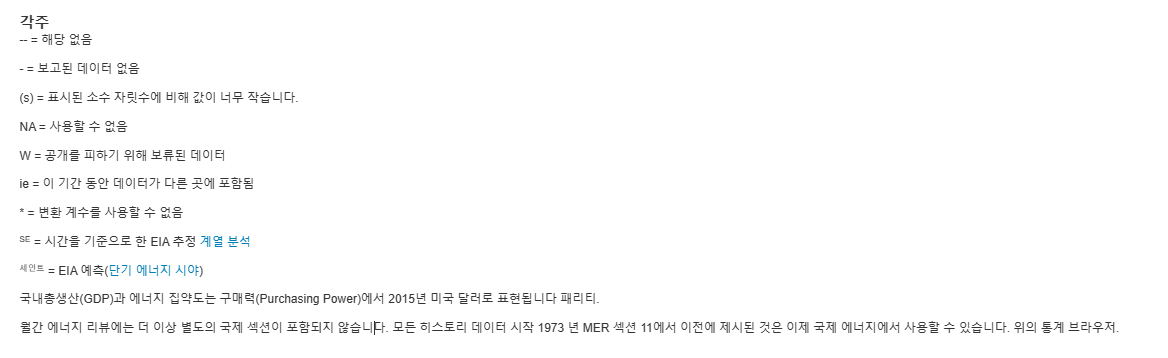  
  
해당 각주에 포함되는 값은 None으로 결정.   
ie의 경우가 가장 큰 문제임. 다른 곳과 연관되어 있는 데이터라고 생각이되지만, ie가 들어있는 국가는 앞으로 분석할 국가가 아님 따라서 None으로 결정.  
'French Guiana', 'Guadeloupe', 'Martinique', 'Reunion' 4개의 국가 밖에 없음.

In [239]:
df

,COUNTRY,EMISSIONS,Year,Value
0,World,CO2 emissions (MMtonnes CO2),1980,18719.16226
1,World,Coal and coke (MMtonnes CO2),1980,7491.61815
2,World,Consumed natural gas (MMtonnes CO2),1980,2842.337165
3,World,Petroleum and other liquids (MMtonnes CO2),1980,8385.206946
4,Afghanistan,CO2 emissions (MMtonnes CO2),1980,1.325964518
...,...,...,...,...
38635,Zambia,Petroleum and other liquids (MMtonnes CO2),2021,4.272046215
38636,Zimbabwe,CO2 emissions (MMtonnes CO2),2021,8.118909789
38637,Zimbabwe,Coal and coke (MMtonnes CO2),2021,4.149746663
38638,Zimbabwe,Consumed natural gas (MMtonnes CO2),2021,0


In [240]:
# '--' 값을 None으로 바꾸기
df['Value'] = df['Value'].replace('--', None)


In [241]:
# 'ie' 값을 None으로 바꾸기
df['Value'] = df['Value'].replace('ie', None)

In [242]:
df['Value']= df['Value'].astype(dtype='float64')

In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38640 entries, 0 to 38639
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   COUNTRY    38640 non-null  object 
 1   EMISSIONS  38640 non-null  object 
 2   Year       38640 non-null  int64  
 3   Value      38138 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.2+ MB


나머지도 형변환을 진행하겠습니다.

In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38640 entries, 0 to 38639
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   COUNTRY    38640 non-null  object 
 1   EMISSIONS  38640 non-null  object 
 2   Year       38640 non-null  int64  
 3   Value      38138 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.2+ MB


# 데이터 시각화 진행 

'CO2 emissions (MMtonnes CO2)': 해당 연도의 총 co2 배출량,    

'Coal and coke (MMtonnes CO2)': 해당 연도의 석탄으로 발생한 co2 배출량,  

'Petroleum and other liquids (MMtonnes CO2)': 해당 연도의 석유로 발생한 co2 배출량,  
    
'Consumed natural gas (MMtonnes CO2)': 해당 연도의 천연가스로 발생한 co2 배출량

In [245]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 한글 깨짐 방지 
plt.rcParams['font.family'] = 'NanumGothic' 

In [246]:
# 모든 국가 데이터

world = df[df['COUNTRY'].values == 'World']
world.sort_values(by='Value', ascending=False, inplace=True)

C:\Users\vlrms\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [247]:
world.head(20)  # 2019년도가 전 세계적으로 탄소배출이 많았음.

,COUNTRY,EMISSIONS,Year,Value
35880,World,CO2 emissions (MMtonnes CO2),2019,35655.03069
34960,World,CO2 emissions (MMtonnes CO2),2018,35617.66427
37720,World,CO2 emissions (MMtonnes CO2),2021,35462.72411
34040,World,CO2 emissions (MMtonnes CO2),2017,35003.04482
31280,World,CO2 emissions (MMtonnes CO2),2014,34869.28878
30360,World,CO2 emissions (MMtonnes CO2),2013,34819.96544
32200,World,CO2 emissions (MMtonnes CO2),2015,34810.52097
33120,World,CO2 emissions (MMtonnes CO2),2016,34630.11177
29440,World,CO2 emissions (MMtonnes CO2),2012,34397.05219
36800,World,CO2 emissions (MMtonnes CO2),2020,33679.78865


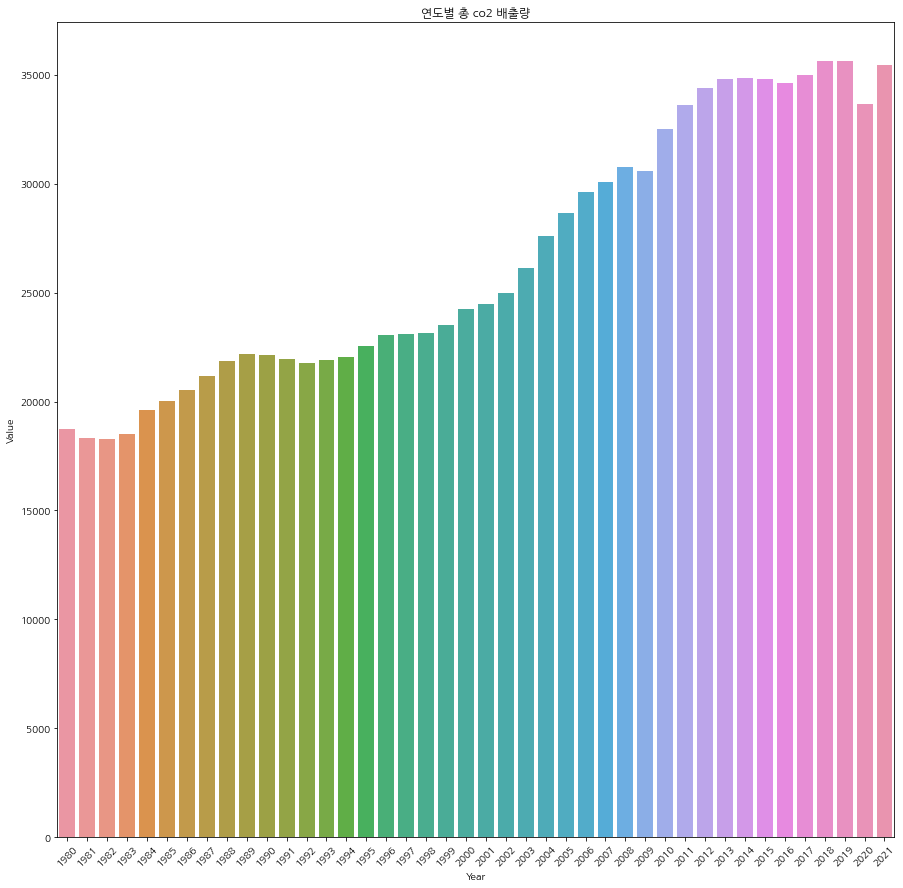

In [248]:
# CO2 emissions (MMtonnes CO2)는 해당 연도에서 발생한 총 co2 값. 따라서 CO2를 따로 보려고 꺼냈음.
y = world[world['EMISSIONS'].values == 'CO2 emissions (MMtonnes CO2)']
 
plt.figure(figsize=(15,15))
sns.barplot(data=world, x='Year', y=y['Value'], ci=None)
plt.title("연도별 총 co2 배출량")
plt.xticks(rotation=45)
plt.show()

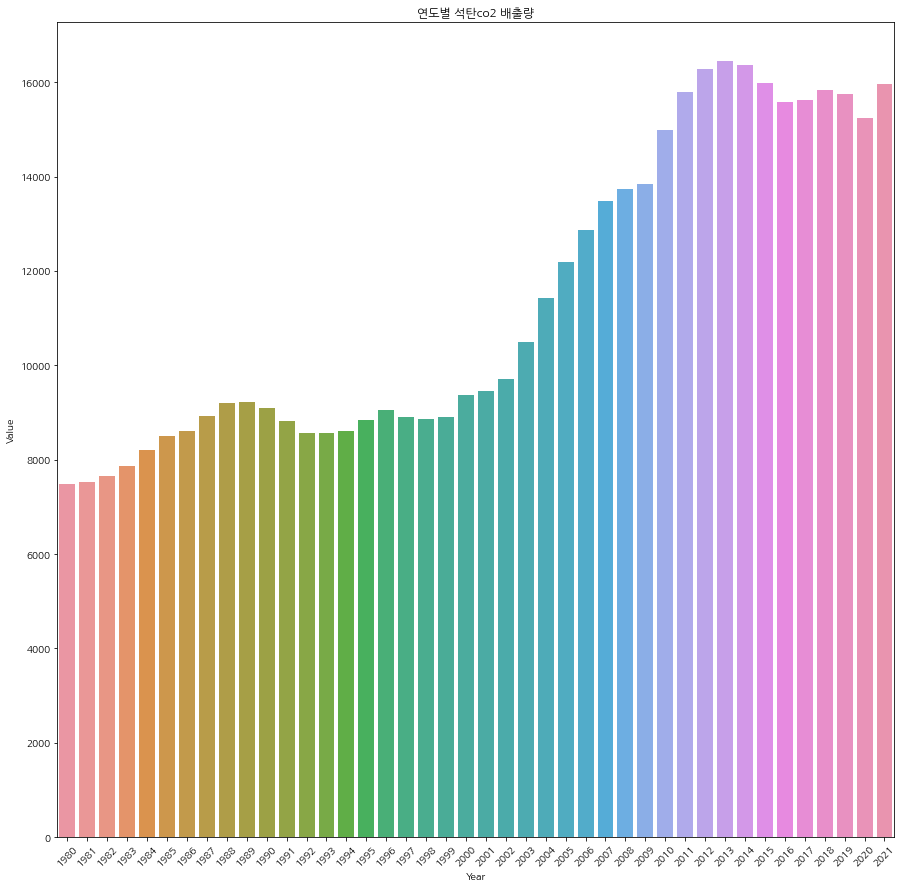

In [249]:

y = world[world['EMISSIONS'].values == 'Coal and coke (MMtonnes CO2)']

plt.figure(figsize=(15,15))
sns.barplot(data=world, x='Year', y=y['Value'], ci=None)
plt.title("연도별 석탄co2 배출량")
plt.xticks(rotation=45)
plt.show()

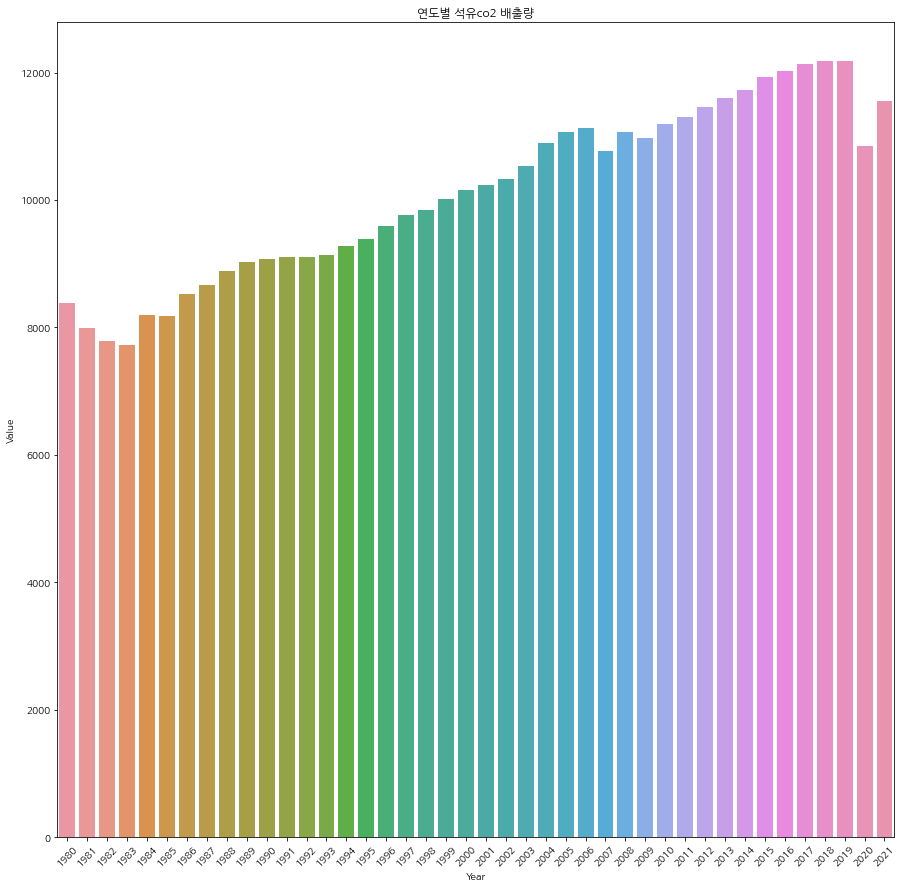

In [250]:

y = world[world['EMISSIONS'].values == 'Petroleum and other liquids (MMtonnes CO2)']

plt.figure(figsize=(15,15))
sns.barplot(data=world, x='Year', y=y['Value'], ci=None)
plt.title("연도별 석유co2 배출량")
plt.xticks(rotation=45)
plt.show()

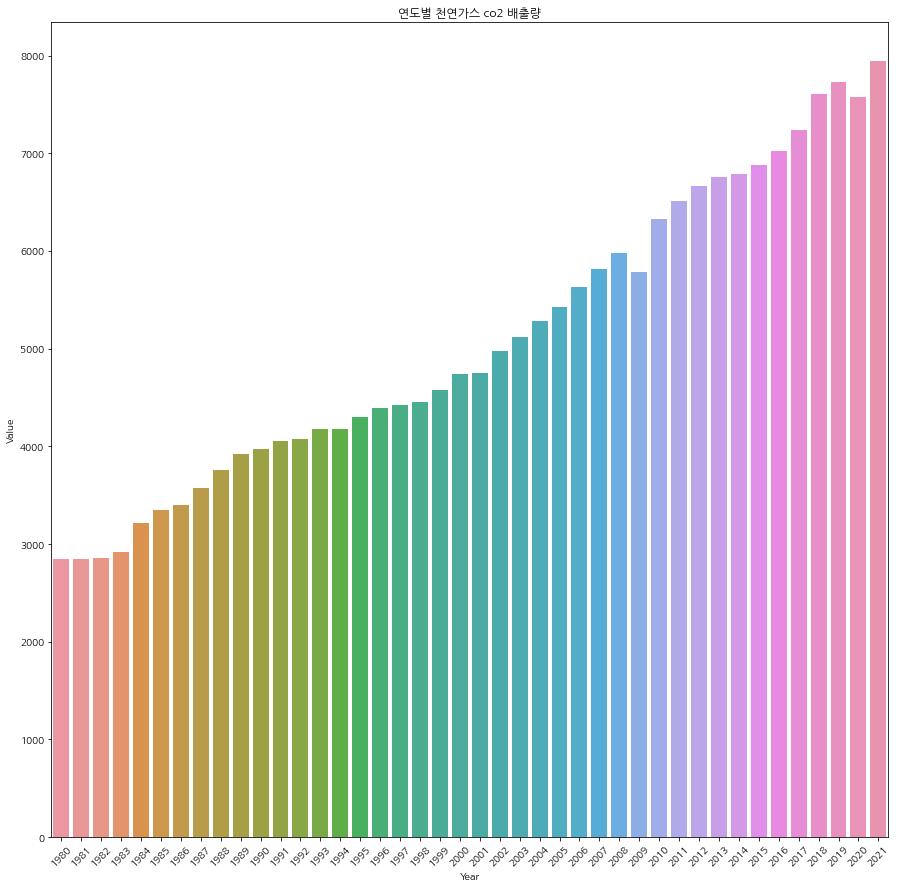

In [251]:

y = world[world['EMISSIONS'].values == 'Consumed natural gas (MMtonnes CO2)']

plt.figure(figsize=(15,15))
sns.barplot(data=world, x='Year', y=y['Value'], ci=None)
plt.title("연도별 천연가스 co2 배출량")
plt.xticks(rotation=45)
plt.show()

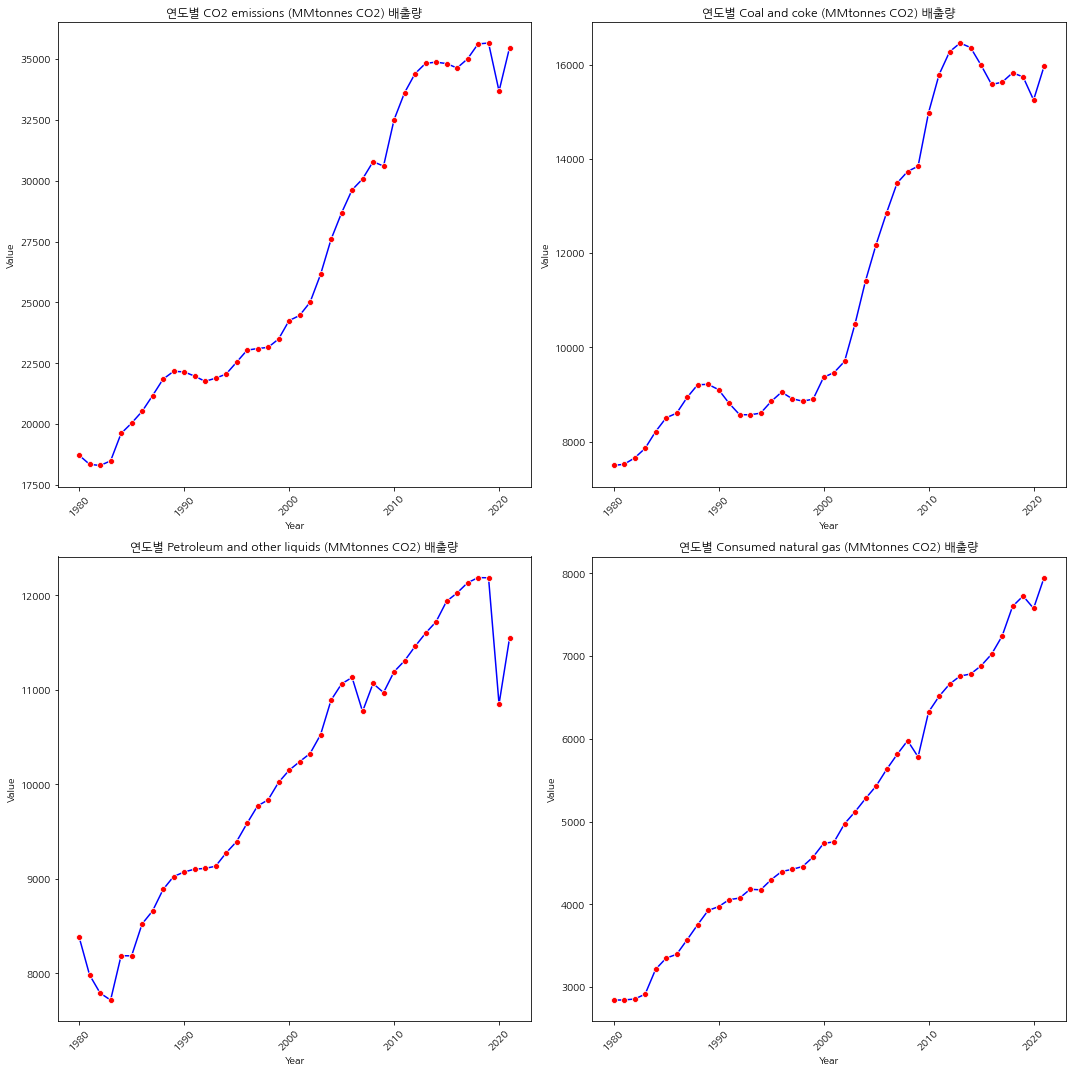

In [261]:
# 한 눈에 보기 편하려고 subplot을 활용하여 출력 

import matplotlib.pyplot as plt
import seaborn as sns

# 데이터프레임 world에서 각 emissions에 대한 데이터 추출
emissions = ['CO2 emissions (MMtonnes CO2)', 'Coal and coke (MMtonnes CO2)',
             'Petroleum and other liquids (MMtonnes CO2)', 'Consumed natural gas (MMtonnes CO2)']


# 그래프 크기 설정
plt.figure(figsize=(15, 15))

# 2x2 그리드에 서브플롯 생성
for i, emission in enumerate(emissions, 1):
    plt.subplot(2, 2, i)
    
    # 해당 emissions에 대한 데이터 추출
    y = world[world['EMISSIONS'] == emission]
    
    # Bar plot 그리기 (단색으로 적용)
    sns.lineplot(data=world, x='Year', y=y['Value'], marker='o', ci=None, markersize=6, markerfacecolor='red', color='Blue')
    plt.title(f'연도별 {emission} 배출량')
    plt.xticks(rotation=45)

# 그래프 간 간격 조절
plt.tight_layout()

# 그래프 출력
plt.show()


에너지원에 따른 탄소배출을 살펴본 결과 전부 다 비슷한 그래프를 형상하는 모습  
공통적으로 코로나 기간 잠깐 탄소배출이 줄어든 모습을 보임.   
탄소배출이 많은 애너지원 순서: 석탄 > 석유 > 천연가스   순서

In [ ]:
world['EMISSIONS'].unique()

array(['CO2 emissions (MMtonnes CO2)', 'Coal and coke (MMtonnes CO2)',
       'Petroleum and other liquids (MMtonnes CO2)',
       'Consumed natural gas (MMtonnes CO2)'], dtype=object)

In [ ]:
sorted_value = df.sort_values(by='Value', ascending=False)

sorted_value

,COUNTRY,EMISSIONS,Year,Value
35880,World,CO2 emissions (MMtonnes CO2),2019,35655.03069
34960,World,CO2 emissions (MMtonnes CO2),2018,35617.66427
37720,World,CO2 emissions (MMtonnes CO2),2021,35462.72411
34040,World,CO2 emissions (MMtonnes CO2),2017,35003.04482
31280,World,CO2 emissions (MMtonnes CO2),2014,34869.28878
...,...,...,...,...
38099,Hawaiian Trade Zone,Petroleum and other liquids (MMtonnes CO2),2021,NaN
38335,Northern Mariana Islands,Petroleum and other liquids (MMtonnes CO2),2021,NaN
38567,Tuvalu,Petroleum and other liquids (MMtonnes CO2),2021,NaN
38574,U.S. Territories,Consumed natural gas (MMtonnes CO2),2021,NaN


In [ ]:

'''

import matplotlib.pyplot as plt

# 국가명과 GDP 데이터 추출
countries = df['COUNTRY']
gdp_usa = df.loc[df['COUNTRY'] == 'United States'].values.flatten()[2:]
gdp_jpn = df_gdp.loc[df_gdp['Country Name'] == 'Japan'].values.flatten()[2:]

# 그래프 설정
plt.figure(figsize=(12, 6))
plt.plot(range(1960, 2022), gdp_usa, marker='o', label='United States')
plt.plot(range(1960, 2022), gdp_jpn, marker='o', label='Japan')

plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('GDP Comparison: United States vs Japan')
plt.legend()

plt.grid(True)
plt.show()

 
import random
import plotly.graph_objects as go
import plotly

top_revenue_by_country = df.loc[df.groupby('COUNTRY')['EMISSIONS']]

for country in top_revenue_by_country['COUNTRY'].unique():
    country_df = top_revenue_by_country[top_revenue_by_country['COUNTRY'] == country]
    fig = go.Figure(data=[go.Pie(labels=country_df['Organization Name'], values=country_df['CO2 emissions (MMtonnes CO2)'], 
                              hole=.3, textinfo='label+percent',marker=dict(colors=random.choices(plotly.colors.DEFAULT_PLOTLY_COLORS)))])
    fig.update_layout(title=f'Top 10 Grossing Companies in {country}', width=700, height=400)
    fig.show()

'''

In [262]:
# 미국 United States

usa = df[df['COUNTRY'].values == 'United States']
usa.sort_values(by='Value', ascending=False, inplace=True)

usa.head()

C:\Users\vlrms\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,COUNTRY,EMISSIONS,Year,Value
25716,United States,CO2 emissions (MMtonnes CO2),2007,6015.570889
23876,United States,CO2 emissions (MMtonnes CO2),2005,6007.026097
22956,United States,CO2 emissions (MMtonnes CO2),2004,5993.753168
24796,United States,CO2 emissions (MMtonnes CO2),2006,5929.361338
19276,United States,CO2 emissions (MMtonnes CO2),2000,5888.617680


In [ ]:
# 중국 China

china = df[df['COUNTRY'].values == 'China']
china.sort_values(by='Value', ascending=False, inplace=True)

china.head()

In [ ]:
# 한국 South Korea

korea = df[df['COUNTRY'].values == 'South Korea']
korea.sort_values(by='Value', ascending=False, inplace=True)

korea.head()

In [ ]:
# 일본 Japan

japan = df[df['COUNTRY'].values == 'Japan']
japan.sort_values(by='Value', ascending=False, inplace=True)

japan.head()

In [ ]:
# 영국 United Kingdom

In [ ]:
# 프랑스 Frence

In [ ]:
# 독일 Germany

In [ ]:
# 구소련 Former U.S.S.R.

In [ ]:
# 러시아 Russia

In [ ]:
# 인도 India 

In [ ]:
# 호주 Australia 